# Input/Output

In this section, we introduce how to input and output proxy data with `cfr`.

`cfr` provides a useful class called `ProxyDatabase` to conveniently store a collection of proxy records.
Each record is stored in the form of a class called `ProxyRecord`.
Here, we take the PAGES 2k global multiproxy database ([PAGES2k Consortium, 2017](https://doi.org/10.1038/sdata.2017.88)) as an example to illustrate the basic usage of these two classes regarding data input/output.

Essentially, `cfr` supports below conversions:

- `pandas.DataFrame` <=> `cfr.ProxyDatabase`
- a netCDF file <=> `cfr.ProxyDatabase`
- a netCDF file <=> `cfr.ProxyRecord`

In addition, `cfr` supports **remote loading** of hosted databases.

Required data to complete this tutorial:

- PAGES2k Phase 2 database: [pages2k_updated_Palmyra_dataset.pkl](https://github.com/fzhu2e/cfr/raw/main/docsrc/notebooks/data/pages2k_updated_Palmyra_dataset.pkl)

In [1]:
# import the packages we need for this tutorial
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import xarray as xr
import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

## `pandas.DataFrame` => `cfr.ProxyDatabase`
### Load the PAGES2k network stored in a `pandas.DataFrame`

In [5]:
df = pd.read_pickle('./data/pages2k_updated_Palmyra_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

### Create a `cfr.ProxyDatabase` and load from the `pandas.DataFrame`

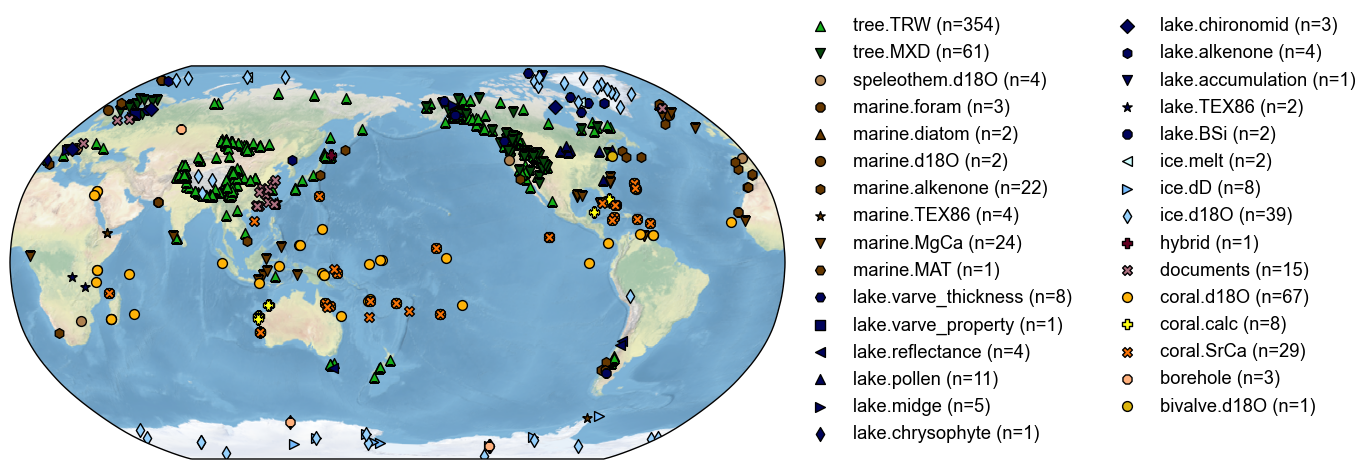

In [7]:
pdb = cfr.ProxyDatabase().from_df(df)
fig, ax = pdb.plot()  # plot to have a check

## `cfr.ProxyDatabase` => `pandas.DataFrame`

Any `cfr.ProxyDatabase` can be converted to a `pandas.DataFrame`.

In [9]:
df = pdb.to_df()
df

pid    lat     lon    elev                 ptype  \
0    NAm_153   52.7   241.7  1850.0              tree.TRW   
1    Asi_245   23.0   114.0  2200.0             documents   
2    NAm_165   37.9   252.3  3400.0              tree.MXD   
3    Asi_178  28.77   83.73  2500.0              tree.TRW   
4    Asi_174  28.18   85.43  4000.0              tree.TRW   
..       ...    ...     ...     ...                   ...   
687  Asi_201  35.88   74.18  3630.0              tree.TRW   
688  Asi_179   27.5   88.02  3400.0              tree.TRW   
689  Arc_014  63.62    29.1    95.0  lake.varve_thickness   
690  Ocn_071   16.2  298.51    -1.7            coral.d18O   
691  Ocn_072   16.2  298.51    -1.7            coral.SrCa   

                                                  time  \
0    [1563.0, 1564.0, 1565.0, 1566.0, 1567.0, 1568....   
1    [1500.0, 1510.0, 1520.0, 1530.0, 1540.0, 1550....   
2    [1626.0, 1627.0, 1628.0, 1629.0, 1630.0, 1631....   
3    [1303.0, 1304.0, 1305.0, 1306.0, 1307.0, 1308....   
4    [1559.0, 1560.0, 1561.0, 1562.0, 1563.0, 1564....   
..                                                 ...   
687  [1574.0, 1575.0, 1576.0, 1577.0, 1578.0, 1579....   
688  [1525.0, 1526.0, 1527.0, 1528.0, 1529.0, 1530....   
689  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...   
690  [1895.7, 1895.78, 1895.87, 1895.95, 1896.03, 1...   
691  [1895.7, 1895.78, 1895.87, 1895.95, 1896.03, 1...   

                                                 value  
0    [0.883, 0.942, 1.043, 0.945, 1.141, 0.715, 0.6...  
1    [0.157429639092533, -0.118646665464906, 0.3035...  
2    [1.071, 1.014, 1.014, 0.966, 1.005, 1.072, 1.0...  
3    [0.889, 0.788, 0.836, 0.741, 0.613, 0.732, 0.7...  
4    [1.172, 1.21, 1.145, 1.307, 1.368, 1.37, 1.152...  
..                                                 ...  
687  [1.212, 0.873, 0.859, 0.968, 0.737, 0.956, 0.8...  
688  [1.316, 1.139, 1.224, 1.416, 1.305, 1.259, 1.2...  
689  [-1.3, -0.84, -0.43, -0.69, -0.51, -0.51, -0.5...  
690  [-4.022, -3.88738, -3.8065, -3.794, -3.79977, ...  
691  [8.838, 8.91364, 8.94958, 8.935, 8.95551, 8.95...  

[692 rows x 7 columns]

## `cfr.ProxyDatabase` => a netCDF file

Note that converting a `cfr.ProxyDatabase` to a netCDF file comes with the limitation that the time axis prior to 1 CE will be truncated since that is not supported yet.

In [5]:
pdb.to_nc('./data/PAGES2k.nc')

100%|██████████| 692/692 [00:18<00:00, 37.40it/s]


ProxyDatabase saved to: ./data/PAGES2k.nc


In [6]:
ds = xr.open_dataset('./data/PAGES2k.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 24096)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 2012-01-01 00:00:00
Data variables: (12/692)
    NAm_153  (time) float64 ...
    Asi_245  (time) float64 ...
    NAm_165  (time) float64 ...
    Asi_178  (time) float64 ...
    Asi_174  (time) float64 ...
    Eur_016  (time) float64 ...
    ...       ...
    Ocn_169  (time) float64 ...
    Asi_201  (time) float64 ...
    Asi_179  (time) float64 ...
    Arc_014  (time) float64 ...
    Ocn_071  (time) float64 ...
    Ocn_072  (time) float64 ...

## a netCDF file => `cfr.ProxyDatabase`

Now we load the generated netCDF file into a `cfr.ProxyDatabase`.

(<Figure size 1000x1000 with 1 Axes>, {'map': <GeoAxesSubplot:>})

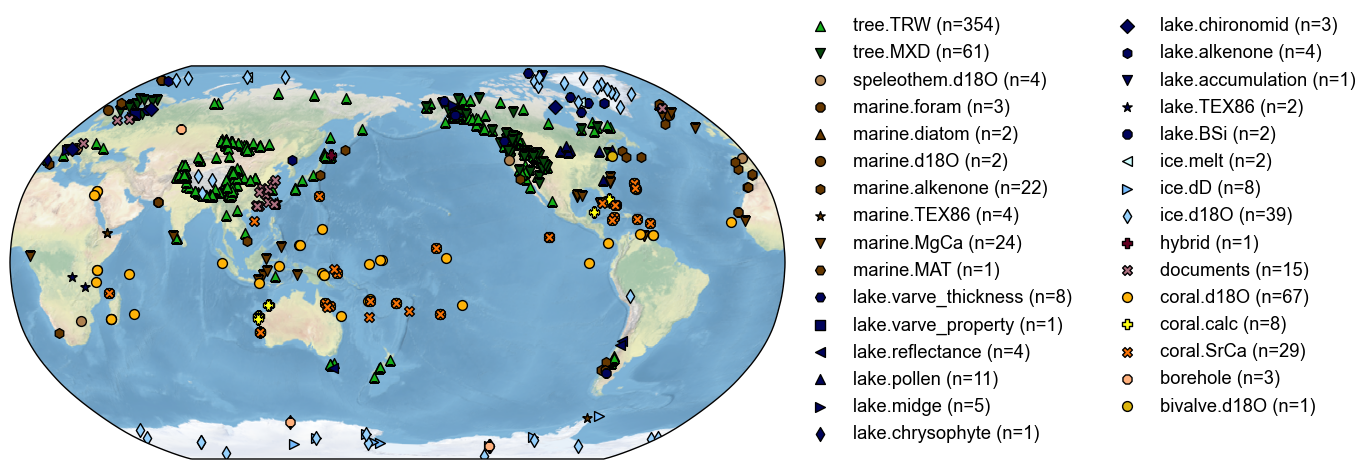

In [7]:
pdb = cfr.ProxyDatabase().load_nc('./data/PAGES2k.nc')
pdb.plot()  # plot to have a check

## `cfr.ProxyRecord` => a netCDF file

Each `cfr.ProxyRecord` can be saved to a netCDF file as well.

In [8]:
pdb.records['NAm_153'].to_nc('./data/NAm_153.nc')

ProxyRecord saved to: ./data/NAm_153.nc


## a netCDF file => `cfr.ProxyRecord`

Now we load the saved netCDF file to a `cfr.ProxyRecord`.

(<Figure size 1200x400 with 2 Axes>,
 {'ts': <AxesSubplot:title={'center':'NAm_153 (tree.TRW) @ (lat:52.70, lon:241.70)'}, xlabel='Time [yr]', ylabel='trsgi [NA]'>,
  'map': <GeoAxesSubplot:>})

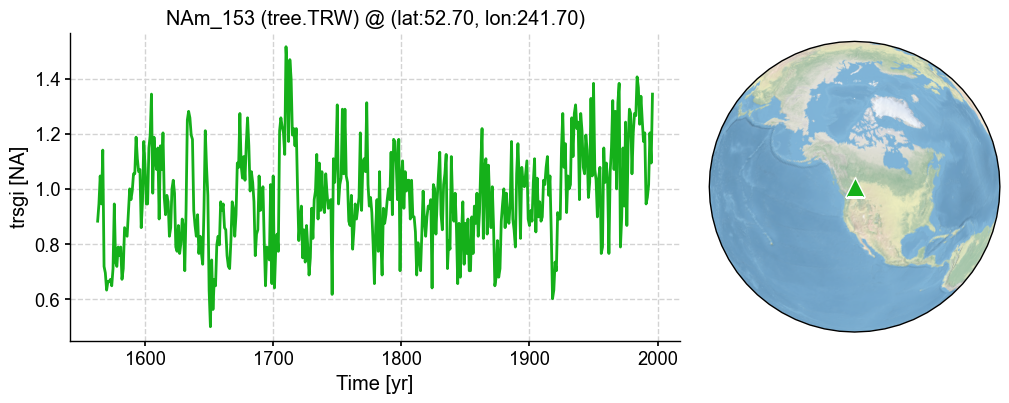

In [9]:
pobj = cfr.ProxyRecord().load_nc('./data/NAm_153.nc')
pobj.plot() # plot the record to have a check

## Remote loading databases

`cfr` supports remote loading of hosted databases, currently including PAGES2kv2 and pseudoPAGES2k.

By calling the `.fetch()` method of `ProxyDatabase` without any arguments, a list of supported database names will be listed:

In [12]:
pdb = cfr.ProxyDatabase().fetch()

>>> Choose one from the supported databases: ['PAGES2k', 'pseudoPAGES2k/ppwn_SNRinf_rta']


### Remote loading PAGES2k

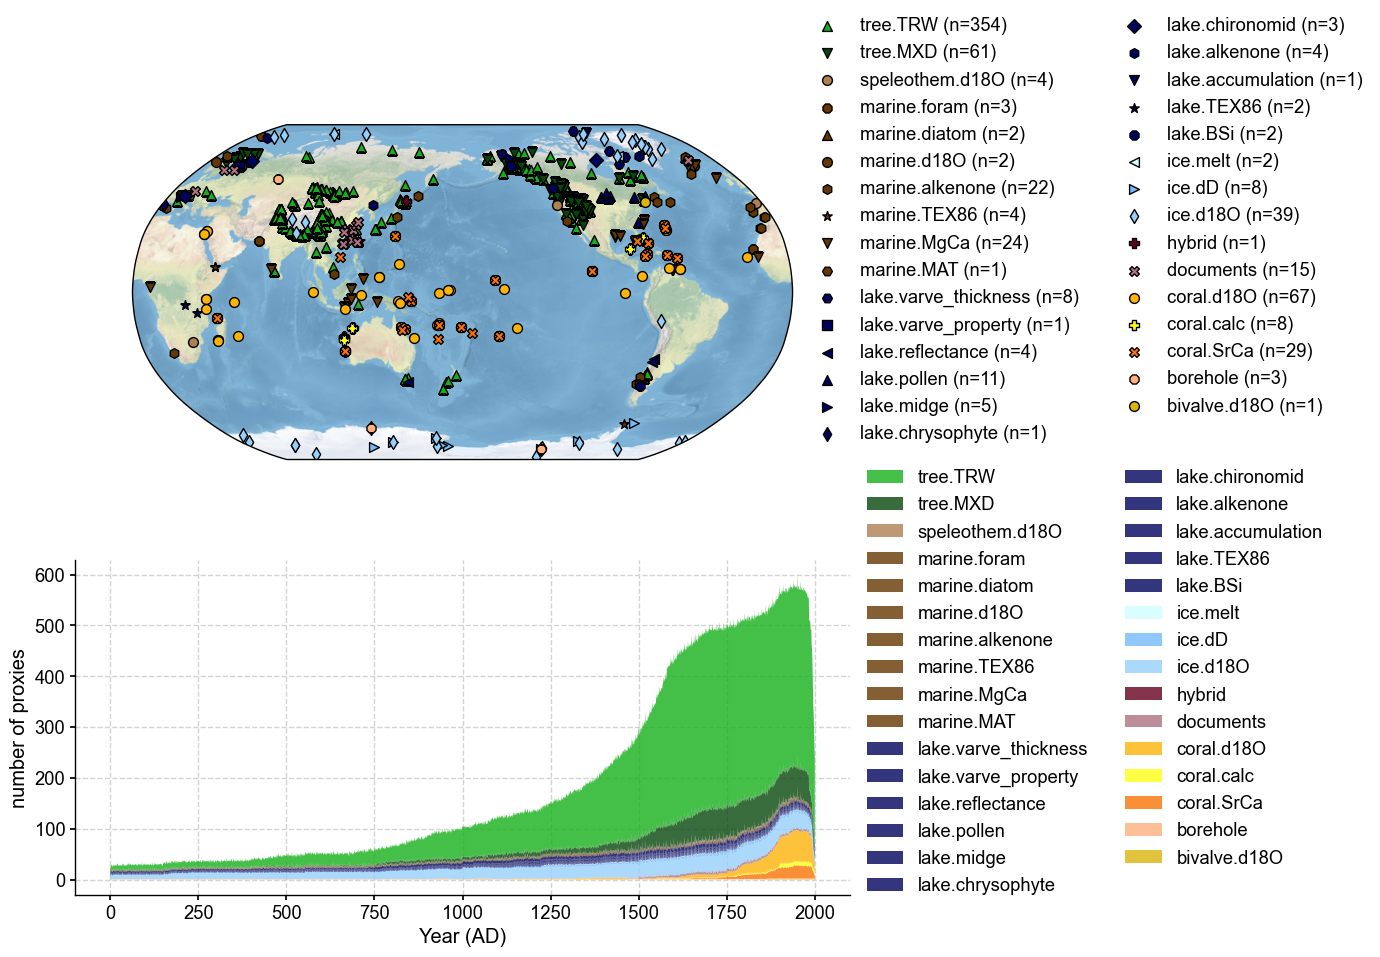

In [14]:
pdb = cfr.ProxyDatabase().fetch('PAGES2k')
fig, ax = pdb.plot(plot_count=True)

### Remote loading pseudoPAGES2k

Note that there are different versions of pseudoPAEGS2k, such as "ppwn_SNRinf_rta" and "tpwn_SNR10_fta".
Those version names should be appended after "pseudoPAEGS2k/".
We show two examples below:

Fetching data: 100%|██████████| 5.30M/5.30M [00:00<00:00, 100MiB/s]


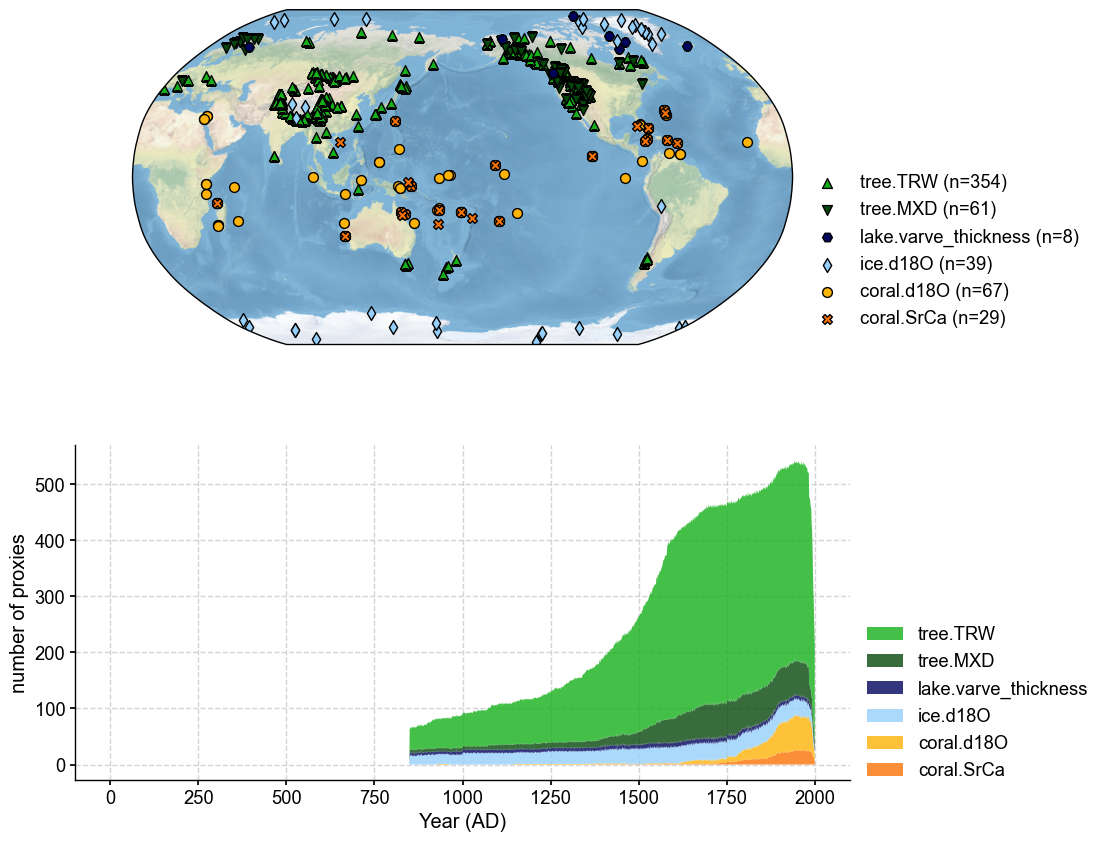

In [16]:
pdb = cfr.ProxyDatabase().fetch('pseudoPAGES2k/ppwn_SNRinf_rta')
fig, ax = pdb.plot(plot_count=True)

Fetching data: 100%|██████████| 5.48M/5.48M [00:00<00:00, 67.3MiB/s]


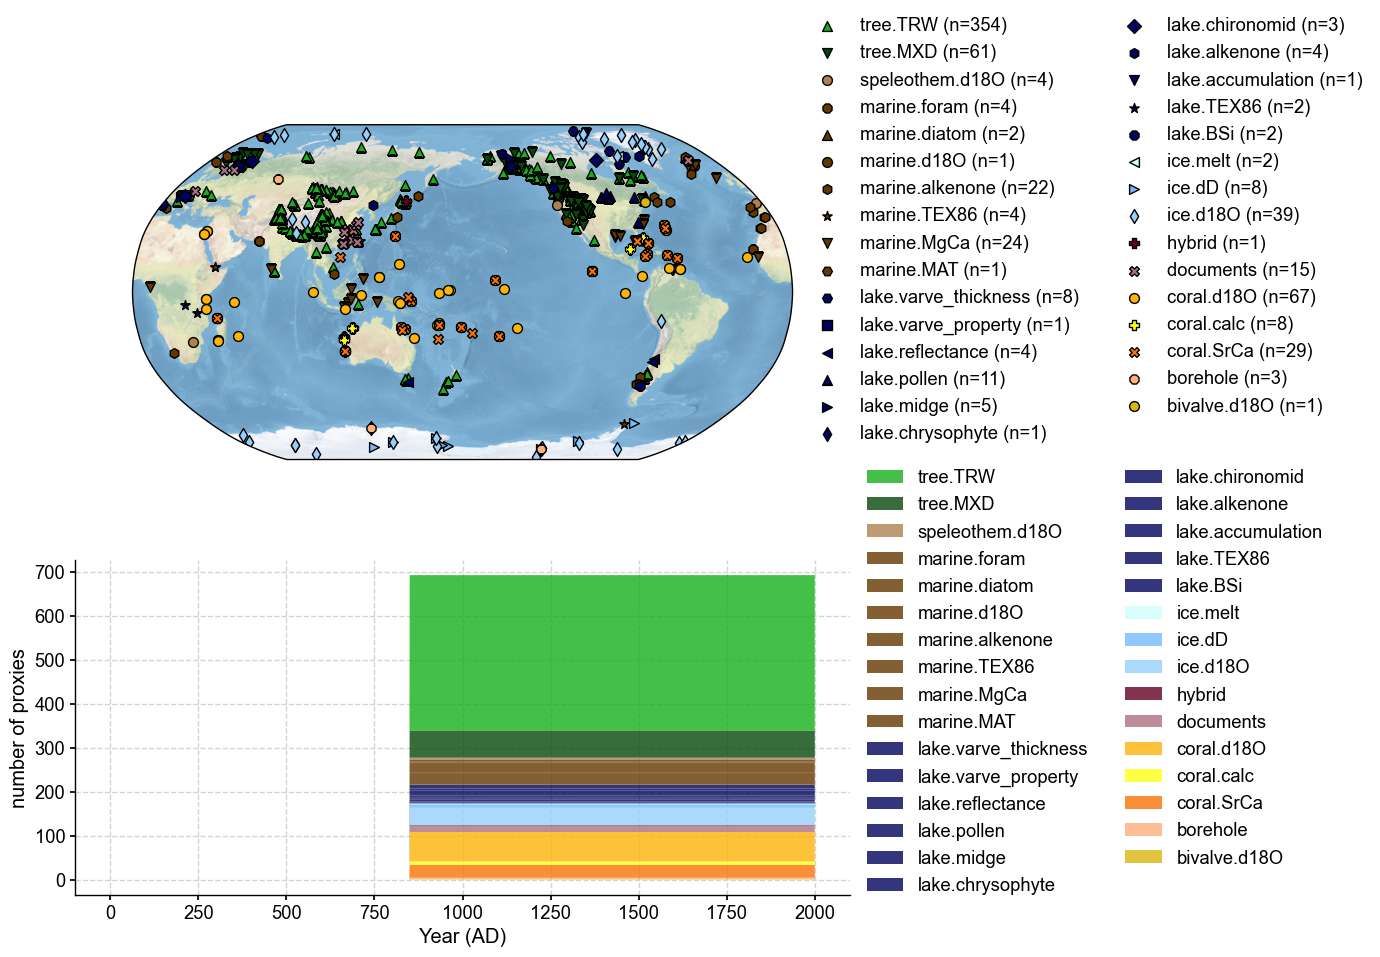

In [17]:
pdb = cfr.ProxyDatabase().fetch('pseudoPAGES2k/tpwn_SNR10_fta')
fig, ax = pdb.plot(plot_count=True)